In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator as idg

In [2]:
train_datagen = idg(rescale=1.0/255,
                   width_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest')
train_data = train_datagen.flow_from_directory('C:/Users/KUSHAGRA/Downloads/Cat Vs Dog/Training/training_set', target_size=(150, 150), batch_size=64, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [3]:
test_datagen = idg(rescale=1.0/255,
                   width_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest')
test_data = test_datagen.flow_from_directory('C:/Users/KUSHAGRA/Downloads/Cat Vs Dog/Testing/test_set', target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2023 images belonging to 2 classes.


## Model

In [4]:
model = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),                                
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [5]:
model.fit(train_data, validation_data=test_data, epochs=20)

Epoch 1/20
126/126 [==============================] - 81s 634ms/step - loss: 0.7602 - accuracy: 0.5182 - val_loss: 0.6902 - val_accuracy: 0.5220
Epoch 2/20
126/126 [==============================] - 69s 544ms/step - loss: 0.6839 - accuracy: 0.5629 - val_loss: 0.6753 - val_accuracy: 0.5828
Epoch 3/20
126/126 [==============================] - 68s 541ms/step - loss: 0.6717 - accuracy: 0.5905 - val_loss: 0.6781 - val_accuracy: 0.5472
Epoch 4/20
126/126 [==============================] - 69s 543ms/step - loss: 0.6449 - accuracy: 0.6367 - val_loss: 0.6412 - val_accuracy: 0.6500
Epoch 5/20
126/126 [==============================] - 69s 543ms/step - loss: 0.6236 - accuracy: 0.6555 - val_loss: 0.6070 - val_accuracy: 0.6723
Epoch 6/20
126/126 [==============================] - 68s 547ms/step - loss: 0.6027 - accuracy: 0.6751 - val_loss: 0.6100 - val_accuracy: 0.6846
Epoch 7/20
126/126 [==============================] - 69s 543ms/step - loss: 0.5804 - accuracy: 0.7007 - val_loss: 0.5835 - val_ac

### Prediction

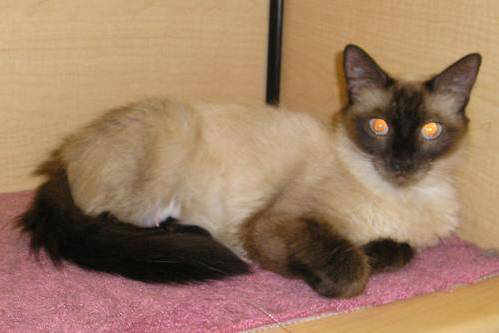

In [6]:
tf.keras.utils.load_img('C:/Users/KUSHAGRA/Downloads/Cat Vs Dog/Testing/test_set/cats/cat.4019.jpg')


In [7]:
test_image = tf.keras.utils.load_img('C:/Users/KUSHAGRA/Downloads/Cat Vs Dog/Testing/test_set/cats/cat.4019.jpg', target_size=(150, 150))

img = tf.keras.utils.img_to_array(test_image)

img = np.expand_dims(img, axis=0)

res = model.predict(img)
train_data.class_indices

if res[0][0] ==1:
    pred='dog'
else:
    pred = 'cat'

print(pred)

1/1 [==============================] - 0s 82ms/step
cat


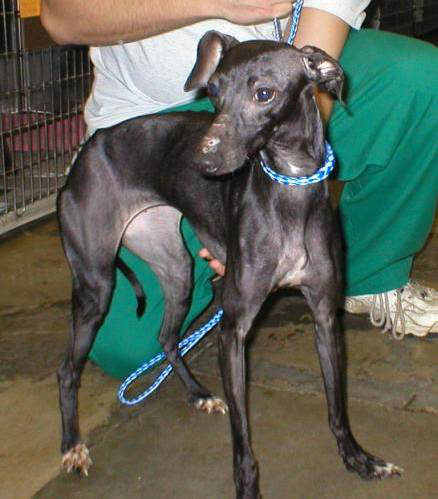

In [8]:
tf.keras.utils.load_img('C:/Users/KUSHAGRA/Downloads/Cat Vs Dog/Testing/test_set/dogs/dog.4004.jpg')


In [9]:
test_image = tf.keras.utils.load_img('C:/Users/KUSHAGRA/Downloads/Cat Vs Dog/Testing/test_set/dogs/dog.4004.jpg', target_size=(150, 150))

img = tf.keras.utils.img_to_array(test_image)

img = np.expand_dims(img, axis=0)

res = model.predict(img)
train_data.class_indices

if res[0][0] ==1:
    pred='dog'
else:
    pred = 'cat'

print(pred)

1/1 [==============================] - 0s 22ms/step
dog


In [ ]:
model.save('model.h5')